In [1]:
# IMPORTING FUNCTIONS FROM DIFFERENT DIRECTORY
import sys
import os

# Add the directory containing your module to the Python path
module_path = os.path.abspath(os.path.join("C://Users//dusty//Documents//REU_2024//mtech_reu_plants"))
if module_path not in sys.path:
    sys.path.append(module_path)

import cv2
import numpy as np
from skimage import io, img_as_float, img_as_ubyte
from matplotlib import pyplot as plt
import glob
import re
from skimage.filters import try_all_threshold, threshold_mean
import skimage.filters as skfil
from functions import reorder_file_paths, extract_filename_number, apply_vegetation_index
from skimage.restoration import denoise_nl_means, estimate_sigma
from scipy import ndimage, stats

In [6]:
# Import image
img = cv2.imread('../photos/test_photos/image_14.jpg')

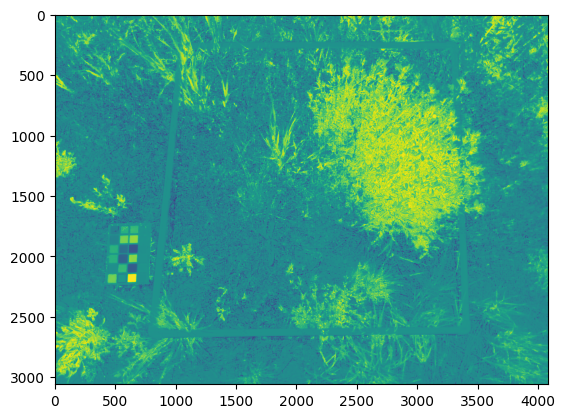

In [7]:
vegetated_img = apply_vegetation_index(img, index_type='rgbvi')

plt.imshow(vegetated_img)

Now try it on all of the test images

In [4]:
# Define a path to the folder that contains the photos I want to test with loops
path = '../photos/test_photos/*'

# Function to extract numeric part of the filename for sorting
def numerical_sort(value):
    # Use regexp to extract the digits in the names
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

# Get a sorted list of files in the folder because otherwise, glob will read the files in the order determined by the operating system.
files = sorted(glob.glob(path), key = numerical_sort)

# Verify that the filenames are in order
print(files)

['../photos/test_photos\\image_0.jpg', '../photos/test_photos\\image_1.jpg', '../photos/test_photos\\image_2.jpg', '../photos/test_photos\\image_3.jpg', '../photos/test_photos\\image_4.jpg', '../photos/test_photos\\image_5.jpg', '../photos/test_photos\\image_6.JPG', '../photos/test_photos\\image_7.JPG', '../photos/test_photos\\image_8.JPG', '../photos/test_photos\\image_9.JPG', '../photos/test_photos\\image_10.JPG', '../photos/test_photos\\image_11.jpg', '../photos/test_photos\\image_12.jpg', '../photos/test_photos\\image_13.jpg', '../photos/test_photos\\image_14.jpg', '../photos/test_photos\\image_15.jpg', '../photos/test_photos\\image_16.jpg', '../photos/test_photos\\image_17.jpg', '../photos/test_photos\\image_18.JPG', '../photos/test_photos\\image_19.JPG', '../photos/test_photos\\image_20.jpg', '../photos/test_photos\\image_21.jpg', '../photos/test_photos\\image_22.jpg', '../photos/test_photos\\image_23.jpg', '../photos/test_photos\\image_24.jpg', '../photos/test_photos\\image_25.j

In [7]:
# Loop through every file in the folder specified by the path
for i, file in enumerate(files):
    # Read in the color image
    img = cv2.imread(file)

    # Use the excess green vegetative index on every image
    vegetated_img = apply_vegetation_index(img, index_type='exg-exr')

    plt.imsave(f'../results/vi_rgbvi/image_{i}.jpg', vegetated_img)

#     # Show each image in its own window.
#     cv2.imshow(f'image {i}', vegetated_img)

# # Allows you to close all windows (individually, or close all with ctrl+w)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Joel would like to see these VI segmentations side by side.  
I'll do it for the methods at which I've gotten reasonable results - ExG, GRVI, and RGBVI.

In [ ]:
index_types = ['exg', 'grvi', 'rgbvi']

In [ ]:
# Try it on one image first
fig, axes = plt.subplots(nrows=1, ncols=2)

og_img = cv2.imread('../photos/test_photos/image_13.jpg')
modified_image = cv2.imread('../results/vi_rgbvi/image_13.jpg')

# Convert images from BGR to RGB (since OpenCV loads images in BGR format)
og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB)

axes[0].imshow(og_img)
axes[0].axis('off')  # Hide the axis

axes[1].imshow(modified_image)
axes[1].axis('off')  # Hide the axis

plt.savefig('../results/vi_side_by_sides/sbs_image_2.jpg')


In [ ]:
for index_type in index_types:
    for i, file in enumerate(files):
        fig, axes = plt.subplots(nrows=1, ncols=2)

        og_img = cv2.imread(file)
        modified_image = cv2.imread(f'../results/vi_{index_type}/image_{i}.jpg')

        # Convert images from BGR to RGB (since OpenCV loads images in BGR format)
        og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
        modified_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB)

        axes[0].imshow(og_img)
        axes[0].axis('off')  # Hide the axis

        axes[1].imshow(modified_image)
        axes[1].axis('off')  # Hide the axis

        plt.savefig(f'../results/vi_side_by_sides/sbs_{index_type}_image_{i}.jpg')


Segment / threshold images based on results of RGBVI calculations

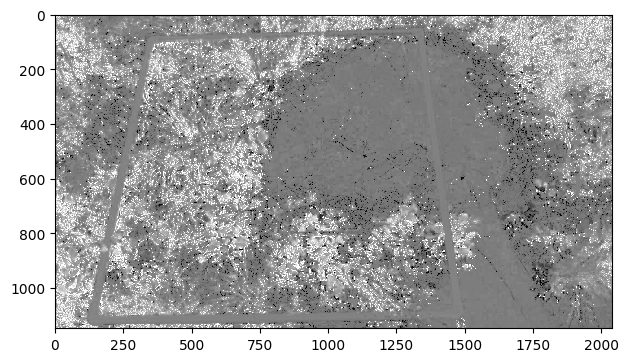

In [31]:
# Start rgbvi process fresh because I probably shouldn't use the color image that was saved because the grayscale images manifest in viridis
img = cv2.imread('../photos/test_photos/image_1.jpg')

img_rgbvi = apply_vegetation_index(img, index_type='rgbvi')

io.imshow(img_rgbvi)

# Convert the image to a float
img_float = img_as_float(img_rgbvi)

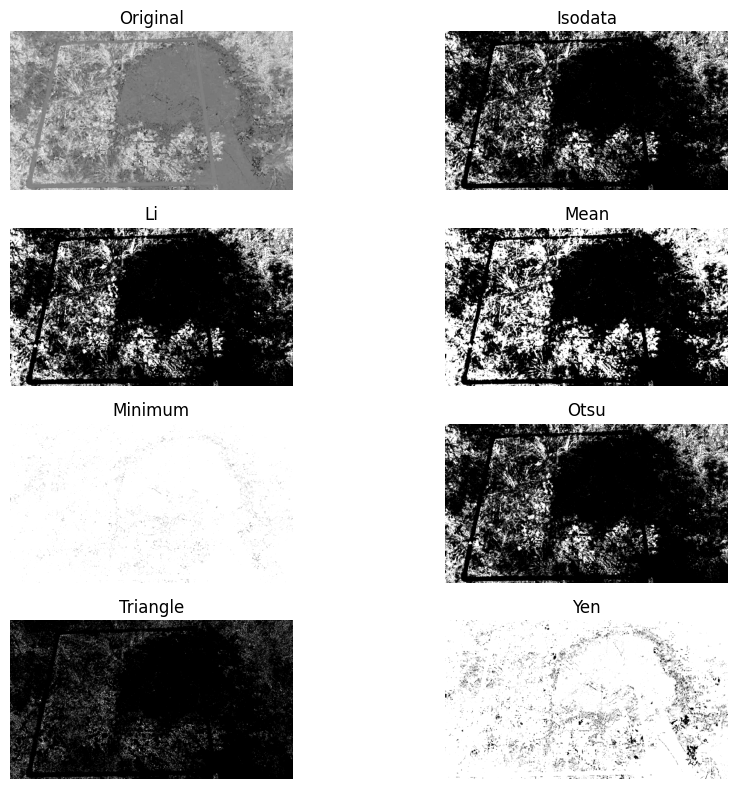

In [22]:
# Show different thresholding methods
fig, ax = try_all_threshold(img_float, figsize=(10,8), verbose=False)

Mean looks pretty good to me.

In [40]:
# Apply the mean threshold.
thresh_otsu = skfil.threshold_otsu(img_float)
thresh_mean = skfil.threshold_mean(img_float)


print(thresh_otsu, thresh_mean) # Threshold is the value that will be the cutoff for what is black and what is white.

# If image is <= to the threshold number, it's True. False otherwise.
binary_otsu = img_float <= thresh_otsu
binary_mean = img_float <= thresh_mean

cv2.imshow('binary otsu', img_as_ubyte(binary_otsu))
cv2.imshow('binary mean', img_as_ubyte(binary_mean))

cv2.waitKey(0)
cv2.destroyAllWindows()

0.669921875 0.5547556839569875


Now do it on all the images. 

In [4]:
files = reorder_file_paths('../photos/test_photos/*')

print(files)

['../photos/test_photos\\image_0.jpg', '../photos/test_photos\\image_1.jpg', '../photos/test_photos\\image_2.jpg', '../photos/test_photos\\image_3.jpg', '../photos/test_photos\\image_4.jpg', '../photos/test_photos\\image_5.jpg', '../photos/test_photos\\image_6.JPG', '../photos/test_photos\\image_7.JPG', '../photos/test_photos\\image_8.JPG', '../photos/test_photos\\image_9.JPG', '../photos/test_photos\\image_10.JPG', '../photos/test_photos\\image_11.jpg', '../photos/test_photos\\image_12.jpg', '../photos/test_photos\\image_13.jpg', '../photos/test_photos\\image_14.jpg', '../photos/test_photos\\image_15.jpg', '../photos/test_photos\\image_16.jpg', '../photos/test_photos\\image_17.jpg', '../photos/test_photos\\image_18.JPG', '../photos/test_photos\\image_19.JPG', '../photos/test_photos\\image_20.jpg', '../photos/test_photos\\image_21.jpg', '../photos/test_photos\\image_22.jpg', '../photos/test_photos\\image_23.jpg', '../photos/test_photos\\image_24.jpg', '../photos/test_photos\\image_25.j

In [18]:
# Loop through every file in the folder specified by the path
for i, file in enumerate(files):
    # Read in the color image
    img = cv2.imread(file)

    # Reduce the image size by half because the windows are too huge.
    img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

    # Use the excess green vegetative index on every image
    rgbvi_img = apply_vegetation_index(img, index_type='rgbvi')

    # Convert image to a float
    img_float = img_as_float(rgbvi_img)

    # Apply Otsu threshold to image
    thresh_otsu = skfil.threshold_otsu(img_float)

    # Pixel is true if it's over the threshold, and false otherwise
    binary_otsu = img_float <= thresh_otsu
    
    plt.imsave(f'../results/post_rgbvi_thresholding/image_{i}.jpg', binary_otsu)
#     cv2.imshow(f'otsu_test_{i}', img_as_ubyte(binary_otsu))

# cv2.waitKey(0)
# cv2.destroyAllWindows()
    

Boxplot that displays every VI value in an image

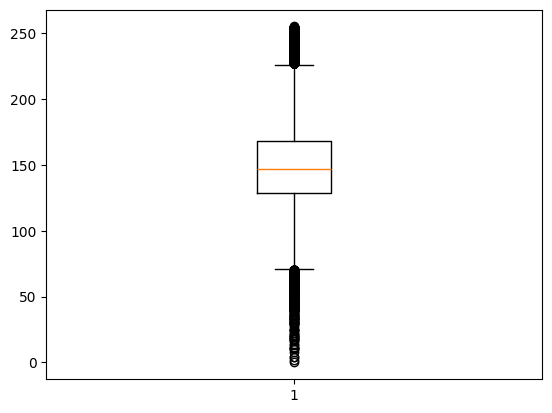

In [21]:
cv2.imread('../photos/test_photos/image_1')

rgbvi_img = apply_vegetation_index(img, index_type='rgbvi')

vi_values = rgbvi_img.flatten()

plt.boxplot(vi_values)

plt.show()

Good heavens, it's hideous! I'm relocating this part of the project to an R script after I finish bleaching my eyes. 

## Making greenhouse images for the boxplots comparing greenness
where everything that's not leaf is blackened or transparent 

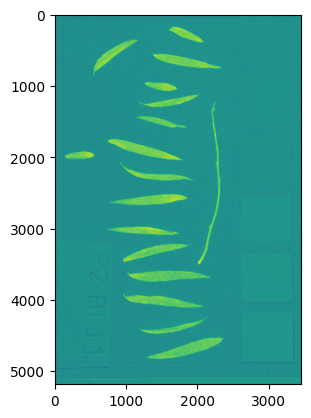

In [2]:
path = '../photos/test_photos_greenhouse/image_10.jpg'

# Load in the image in color
img = cv2.imread(path, 1)

# Apply vegetation index
img_exg = apply_vegetation_index(img, 'exg')

plt.imshow(img_exg)

# cv2.imshow('img', img_rgbvi)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Note here that the ExG vegetative index seems to work better on the greenhouse images. I will be using that index for the boxplots. 

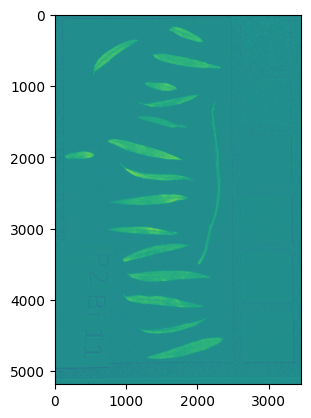

In [9]:
img_rgbvi = apply_vegetation_index(img, 'rgbvi')
plt.imshow(img_rgbvi)


(array([2.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
        2.000000e+00, 1.000000e+00, 3.000000e+00, 5.000000e+00,
        7.000000e+00, 1.100000e+01, 8.000000e+00, 2.700000e+01,
        3.800000e+01, 5.000000e+01, 1.530000e+02, 1.110000e+02,
        1.880000e+02, 9.000000e+01, 4.160000e+02, 3.460000e+02,
        6.410000e+02, 1.600000e+02, 7.510000e+02, 4.910000e+02,
        9.400000e+02, 8.280000e+02, 8.800000e+02, 1.475000e+03,
        1.351000e+03, 2.503000e+03, 8.830000e+02, 3.591000e+03,
        2.593000e+03, 6.136000e+03, 2.254000e+03, 7.501000e+03,
        5.261000e+03, 1.156000e+04, 8.172000e+03, 1.002900e+04,
        1.680200e+04, 1.895500e+04, 4.174400e+04, 3.589800e+04,
        1.030010e+05, 1.504920e+05, 4.592660e+05, 4.448090e+05,
        1.898989e+06, 2.564881e+06, 4.041668e+06, 4.082921e+06,
        3.579910e+05, 1.564013e+06, 3.166530e+05, 2.752940e+05,
        2.996600e+04, 7.024200e+04, 2.591000e+04, 2.904300e+04,
        1.629700e+04, 1.365000e+04, 1.76

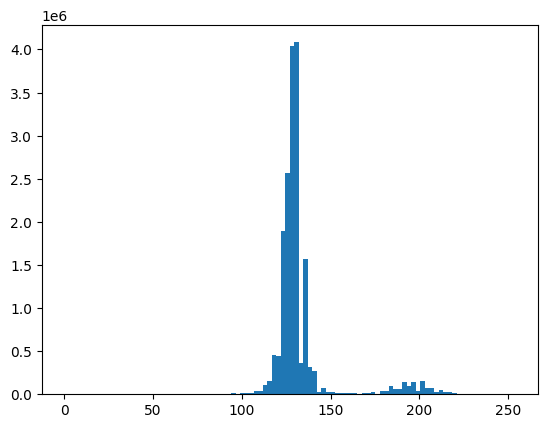

In [12]:
# Investigate histogram of exg modified image
plt.hist(img_exg.flatten(), bins = 100)

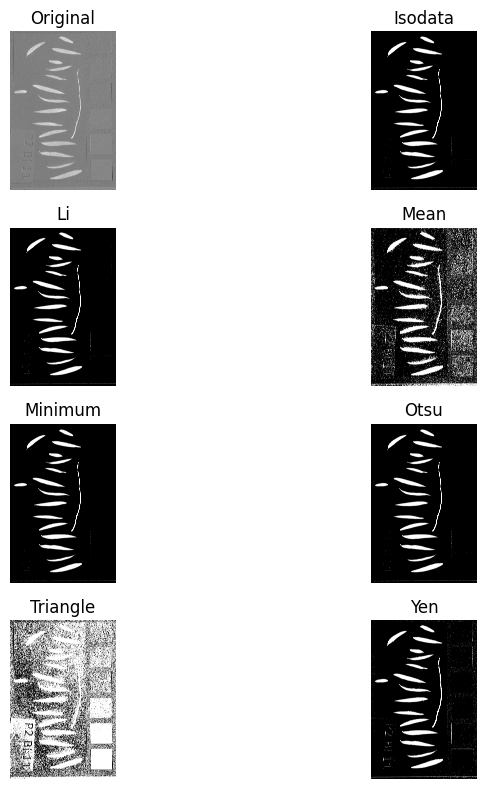

In [3]:
# Segment the image based on the two segmented peaks so beautifully visible here
# Convert the image into a float
img_float = img_as_float(img_exg)

# Show different thresholding methods
fig, ax = try_all_threshold(img_float, figsize=(10,8), verbose=False)

In [10]:
# Apply a threshold method
thresh_min = skfil.threshold_minimum(img_float)
thresh_isodata = skfil.threshold_isodata(img_float)
thresh_li = skfil.threshold_li(img_float)
thresh_otsu = skfil.threshold_otsu(img_float)

binary_isodata = img_as_ubyte(img_float <= thresh_isodata)
binary_li = img_as_ubyte(img_float <= thresh_li)
binary_otsu = img_as_ubyte(img_float <= thresh_otsu)



# If image is <= to the threshold number, it's True. False otherwise.
binary_min = img_float <= thresh_min

# Convert back into a ubyte
img_ubyte = img_as_ubyte(binary_min)

# plt.imshow(img_ubyte)

plt.imsave('../results/greenhouse_min.jpg', img_ubyte, cmap='gray')
plt.imsave('../results/greenhouse_isodata.jpg', binary_isodata, cmap='gray')
plt.imsave('../results/greenhouse_li.jpg', binary_li, cmap='gray')
plt.imsave('../results/greenhouse_otsu.jpg', binary_otsu, cmap='gray')


Now use a for loop to do the same process on every greenhouse test image. 

In [17]:
path = '../photos/test_photos_greenhouse/*'

# Reorder the filepaths to keep the index consistent
files = reorder_file_paths(path)

for i, file in enumerate(files):
    # Read in the files in color
    img = cv2.imread(file, 1)
        
    # Apply vegetative index
    img_exg = apply_vegetation_index(img, 'exg')

    # Convert the image into a float
    img_float = img_as_float(img_exg)

    # Apply a threshold method
    thresh = skfil.threshold_minimum(img_float)

    # If image is <= to the threshold number, it's True. False otherwise.
    binary = img_float <= thresh

    # Convert back into a ubyte
    img_ubyte = img_as_ubyte(binary)

    # Invert the mask because the bitwise_and operation replaces white pixels
    img_binary = cv2.bitwise_not(img_ubyte)

    # Save the images
    i += 1 # Correct index numbers for filenames
    plt.imsave(f'../results/greenhouse_photos_thresholded/image_{i}.jpg', img_binary, cmap='gray')


#     cv2.imshow(f'image {i}', img_binary)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Now that the images are prepared, apply a clipping mask to all of them that keeps only the pixels that belong to leaves (with the exception of some difficult-to-remove noise)

In [32]:
# Establish paths to the raw images and to the masks that will be applied to them
images_path = '../photos/test_photos_greenhouse\\*'
masks_path = '../results\\greenhouse_photos_thresholded\\*'
# I used \\ because the paths pulled from my computer use them instead of /. 

images_files = reorder_file_paths(images_path)
masks_files = reorder_file_paths(masks_path)

# Loop through both file lists to grab from both the original images and their corresponding masks
for i in range(len(images_files)):
    # Establish names of changing variables of the loop
    img_filename = images_files[i]
    mask_filename = masks_files[i]

    print(img_filename, mask_filename)

    img = cv2.imread(img_filename, 1)
    mask = cv2.imread(mask_filename, 0)

    # Apply the binary mask to the original image
    # Only keep the pixels where the binary mask is white (255)
    img_masked = cv2.bitwise_and(img, img, mask = mask)

    i += 1 # Correct the filenames
    cv2.imwrite(f'../results/mask_experiment/image_{i}.jpg', img_masked)


test_photos_greenhouse\image_1.JPG results\greenhouse_photos_thresholded\image_1.jpg
test_photos_greenhouse\image_2.JPG results\greenhouse_photos_thresholded\image_2.jpg
test_photos_greenhouse\image_3.JPG results\greenhouse_photos_thresholded\image_3.jpg
test_photos_greenhouse\image_4.JPG results\greenhouse_photos_thresholded\image_4.jpg
test_photos_greenhouse\image_5.JPG results\greenhouse_photos_thresholded\image_5.jpg
test_photos_greenhouse\image_6.JPG results\greenhouse_photos_thresholded\image_6.jpg
test_photos_greenhouse\image_7.JPG results\greenhouse_photos_thresholded\image_7.jpg
test_photos_greenhouse\image_8.JPG results\greenhouse_photos_thresholded\image_8.jpg
test_photos_greenhouse\image_9.JPG results\greenhouse_photos_thresholded\image_9.jpg
test_photos_greenhouse\image_10.JPG results\greenhouse_photos_thresholded\image_10.jpg


Apply vegetative index to all the masked images.

In [8]:
# Establish path to folder of images I'm looping through
path = '../results/mask_experiment/*'

files = reorder_file_paths(path)

for i, file in enumerate(files):
    # Correct index so it matches file numbers
    i+=1

    # Read the image in color
    img = cv2.imread(file, 1)

    # Apply the ExG vegetative index to the greenhouse photos
    img_vi = apply_vegetation_index(img, 'exg')

    # Save the new vegetated image
    plt.imsave(f'../results/mask_experiment_vi_greenhouse/image_{i}.jpg', img_vi, cmap='gray')

    

Use a histogram to find the cutoff point between leaf and background. The background didn't stay black.
Nevermind I'm gonna go do that in R because it would be easier. 

### Apply RGBVI index to all the cropped test photos

In [4]:
path = '../results\\cropped_photos_resized\\*'

filenames = reorder_file_paths(path)

print(filenames)

['results\\cropped_photos_resized\\image_0.jpg', 'results\\cropped_photos_resized\\image_1.jpg', 'results\\cropped_photos_resized\\image_2.jpg', 'results\\cropped_photos_resized\\image_3.jpg', 'results\\cropped_photos_resized\\image_4.jpg', 'results\\cropped_photos_resized\\image_5.jpg', 'results\\cropped_photos_resized\\image_11.jpg', 'results\\cropped_photos_resized\\image_12.jpg', 'results\\cropped_photos_resized\\image_13.jpg', 'results\\cropped_photos_resized\\image_14.jpg', 'results\\cropped_photos_resized\\image_15.jpg', 'results\\cropped_photos_resized\\image_16.jpg', 'results\\cropped_photos_resized\\image_17.jpg', 'results\\cropped_photos_resized\\image_18.jpg', 'results\\cropped_photos_resized\\image_19.jpg', 'results\\cropped_photos_resized\\image_20.jpg', 'results\\cropped_photos_resized\\image_21.jpg', 'results\\cropped_photos_resized\\image_22.jpg', 'results\\cropped_photos_resized\\image_23.jpg', 'results\\cropped_photos_resized\\image_24.jpg', 'results\\cropped_photos_

In [10]:
for filename in filenames:    
    # Grab the number in the filename
    number = extract_filename_number(filename)

    # Load in the image in color
    img = cv2.imread(filename, 1)

    # Denoise
    # img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Apply the RGBVI to each image
    exr_img = apply_vegetation_index(img, 'rgbvi')

    plt.imsave(f'../results/vi_rgbvi/image_{number}.jpg', exr_img, cmap='viridis')

    print(f'{filename} saved')

results\cropped_photos_resized\image_0.jpg saved
results\cropped_photos_resized\image_1.jpg saved
results\cropped_photos_resized\image_2.jpg saved
results\cropped_photos_resized\image_3.jpg saved
results\cropped_photos_resized\image_4.jpg saved
results\cropped_photos_resized\image_5.jpg saved
results\cropped_photos_resized\image_11.jpg saved
results\cropped_photos_resized\image_12.jpg saved
results\cropped_photos_resized\image_13.jpg saved
results\cropped_photos_resized\image_14.jpg saved
results\cropped_photos_resized\image_15.jpg saved
results\cropped_photos_resized\image_16.jpg saved
results\cropped_photos_resized\image_17.jpg saved
results\cropped_photos_resized\image_18.jpg saved
results\cropped_photos_resized\image_19.jpg saved
results\cropped_photos_resized\image_20.jpg saved
results\cropped_photos_resized\image_21.jpg saved
results\cropped_photos_resized\image_22.jpg saved
results\cropped_photos_resized\image_23.jpg saved
results\cropped_photos_resized\image_24.jpg saved
result

## Debugging the VIs that didn't work

Bad results for these VIs:  exg - exr, exr, vari  
With exr and exg-exr, it turned out to be a divide by zero error. 

In [2]:
# Load in a test image
img = cv2.imread('../results/cropped_photos_resized/image_12.jpg', 1)

# Apply the vis
# exr = apply_vegetation_index(img, 'exr')
# exg_exr = apply_vegetation_index(img, 'exg-exr')
vari = apply_vegetation_index(img, 'vari')
rgbvi = apply_vegetation_index(img, 'rgbvi')

cv2.imshow('og img', img)
# cv2.imshow('exr', exr)
# cv2.imshow('exg-exr', exg_exr)
cv2.imshow('vari', vari)
cv2.imshow('rgbvi', rgbvi)


cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:

# Load in a test image
img = cv2.imread('../results/cropped_photos_resized/image_13.jpg', 1)

print('BEFORE')
print(f"Min value: {img.min()}")
print(f"Max value: {img.max()}")
print(f"Unique values: {np.unique(img)}")

# Apply VARI to image
vari = apply_vegetation_index(img, 'vari')

print('AFTER')
print(f"Min value: {vari.min()}")
print(f"Max value: {vari.max()}")
print(f"Unique values: {np.unique(vari)}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.title('Original Image Histogram')

plt.subplot(1, 2, 2)
plt.hist(vari.ravel(), bins=256, range=[0, 256])
plt.title('Normalized Image Histogram')

plt.show()

# cv2.imshow('vari', vari)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

BEFORE
Min value: 0
Max value: 255
Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 

UnboundLocalError: cannot access local variable 'index' where it is not associated with a value

## Add errorbars

In [4]:
folder = '..\\photos\\test_photos_cropped\\*'

files = reorder_file_paths(folder)

print(files)

['..\\photos\\test_photos_cropped\\image_0.jpg', '..\\photos\\test_photos_cropped\\image_1.jpg', '..\\photos\\test_photos_cropped\\image_2.jpg', '..\\photos\\test_photos_cropped\\image_3.jpg', '..\\photos\\test_photos_cropped\\image_4.jpg', '..\\photos\\test_photos_cropped\\image_5.jpg', '..\\photos\\test_photos_cropped\\image_11.jpg', '..\\photos\\test_photos_cropped\\image_12.jpg', '..\\photos\\test_photos_cropped\\image_13.jpg', '..\\photos\\test_photos_cropped\\image_14.jpg', '..\\photos\\test_photos_cropped\\image_15.jpg', '..\\photos\\test_photos_cropped\\image_16.jpg', '..\\photos\\test_photos_cropped\\image_17.jpg', '..\\photos\\test_photos_cropped\\image_18.jpg', '..\\photos\\test_photos_cropped\\image_19.jpg', '..\\photos\\test_photos_cropped\\image_20.jpg', '..\\photos\\test_photos_cropped\\image_21.jpg', '..\\photos\\test_photos_cropped\\image_22.jpg', '..\\photos\\test_photos_cropped\\image_23.jpg', '..\\photos\\test_photos_cropped\\image_24.jpg', '..\\photos\\test_photos_

In [15]:
for i, path in enumerate(files):
    img = cv2.imread(path, 1)

    vi_img = apply_vegetation_index(img, 'rgbvi')

    image_object = plt.imshow(vi_img, cmap='viridis')
    plt.axis('off')

    # Add colorbar
    cbar = fig.colorbar(image_object, orientation='vertical')
    cbar.set_label('Index Value')  # You can label the colorbar as needed

    plt.savefig(f'../results/cropped_rgbvi/image_{i}.jpg' )

    # Close the plot so it doesn't slurp up all the memory
    plt.close()



C:\Users\dusty\AppData\Local\Temp\ipykernel_13608\3150799818.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1200x1200 with 1 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(image_object, orientation='vertical')
C:\Users\dusty\AppData\Local\Temp\ipykernel_13608\3150799818.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1200x1200 with 1 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(image_object, orientation='vertical')
C:\Users\dusty\AppData\Local\Temp\ipykernel_13608\3150799818.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1200x1200 with 1 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(image_object, orientation='vertical')
C:\Users\dusty\AppData\Local\Temp\ipykernel_13608\3150799818.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480

Make an output that compares all the vegetation indices

In [3]:
# Gather one image from each type of VI
img = cv2.imread('../photos/test_photos_cropped/image_13.jpg', 1)

indexes = ['grvi', 'rgbvi', 'exg', 'exr', 'exg-exr']

grvi = apply_vegetation_index(img, 'grvi')
rgbvi = apply_vegetation_index(img, 'rgbvi')
exg = apply_vegetation_index(img, 'exg')
exr = apply_vegetation_index(img, 'exr')
exgr = apply_vegetation_index(img, 'exg-exr')

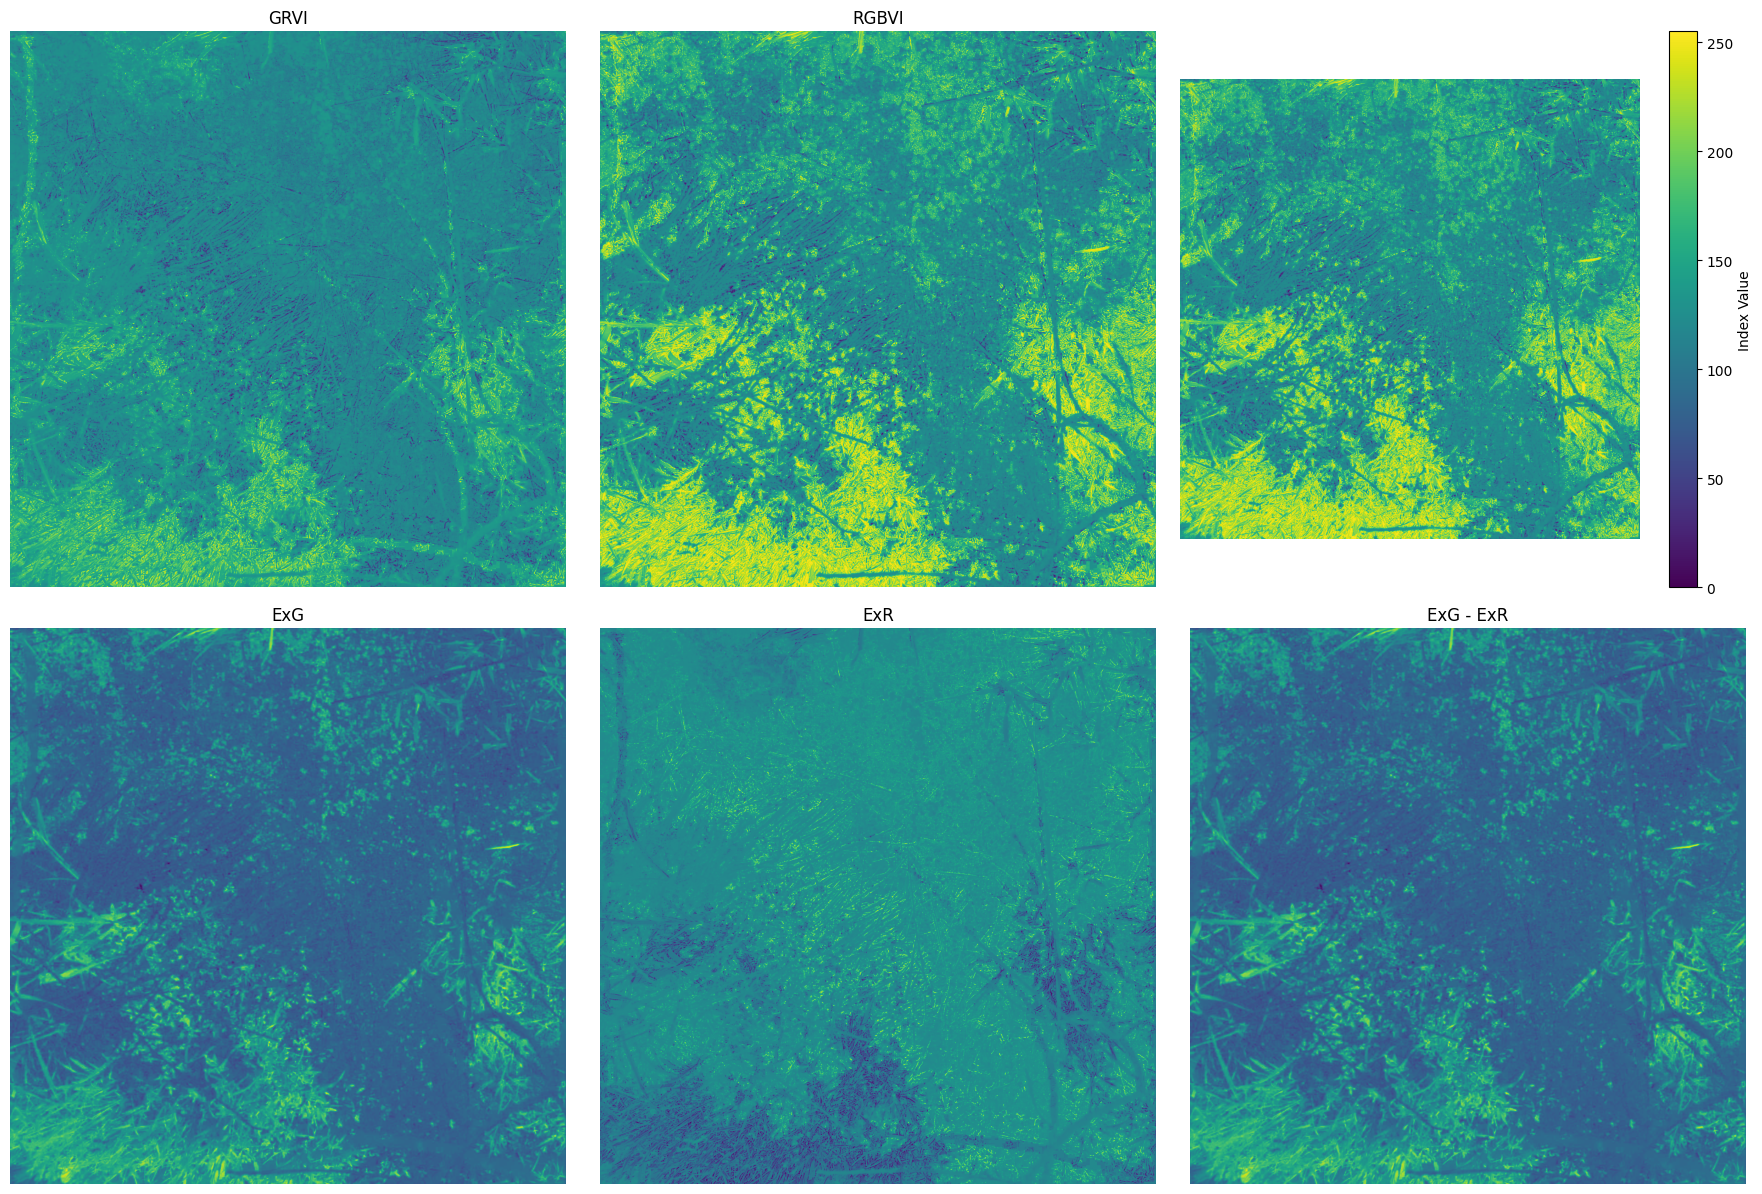

In [7]:
# Arrange them in a grid with a colorbar
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# grvi
axs[0, 0].imshow(grvi, cmap='viridis')
axs[0, 0].set_title('GRVI')
axs[0, 0].axis('off')

# rgbvi
axs[0, 1].imshow(rgbvi, cmap='viridis')
axs[0, 1].set_title('RGBVI')
axs[0, 1].axis('off')

# colorbar
image_object = axs[0, 2].imshow(rgbvi, cmap='viridis')

cbar = fig.colorbar(image_object, ax=axs[0, 2], orientation='vertical')
cbar.set_label('Index Value')  # You can label the colorbar as needed
axs[0, 2].axis('off')

# exg
axs[1, 0].imshow(exg, cmap='viridis')
axs[1, 0].set_title('ExG')
axs[1, 0].axis('off')

# exr
axs[1, 1].imshow(exr, cmap='viridis')
axs[1, 1].set_title('ExR')
axs[1, 1].axis('off')

# exg-exr
axs[1, 2].imshow(exgr, cmap='viridis')
axs[1, 2].set_title('ExG - ExR')
axs[1, 2].axis('off')

# Save image to file
plt.tight_layout()

# Save the grid to file
plt.savefig('../presentation_images/vi_comparison.jpg')